# BAT.jl plotting examples

In [1]:
using BAT
using Distributions
using IntervalSets

┌ Info: Precompiling BAT [c0cd4b16-88b7-57fa-983b-ab80aecada7e]
└ @ Base loading.jl:1273


## Generate samples to be plotted

In [2]:
struct MultiModalModel<:AbstractDensity
    r::Vector{Float64}
    sigma::Vector{Float64}
end

likelihood = let h = 2
    params -> begin

    r1 = logpdf.(MixtureModel(Normal[
       Normal(-10.0, 1.2),
        Normal(0.0, 1.8),
       Normal(10.0, 2.5)], [0.1, 0.3, 0.6]), params.a)

      r2 = logpdf.(MixtureModel(Normal[
      Normal(-5.0, 2.2),
      Normal(5.0, 1.5)], [0.3, 0.7]), params.b)

      r3 = logpdf.(Normal(2.0, 1.5), params.c)

        return LogDVal(r1+r2+r3)
    end
end

prior = BAT.NamedTupleDist(
    a = Normal(-3, 4.5),
    b = -30.0..30.0,
    c = Normal(3, 3.5)
)

posterior = PosteriorDensity(likelihood, prior);

samples, chains = bat_sample(posterior, (10^5, 4), MetropolisHastings())

┌ Info: Trying to generate 4 viable MCMC chain(s).
└ @ BAT /home/cornelius/Projects/julia/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:206
┌ Info: Selected 4 MCMC chain(s).
└ @ BAT /home/cornelius/Projects/julia/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:317
┌ Info: Begin tuning of 4 MCMC chain(s).
└ @ BAT /home/cornelius/Projects/julia/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:72
┌ Info: MCMC Tuning cycle 1 finished, 4 chains, 0 tuned, 4 converged.
└ @ BAT /home/cornelius/Projects/julia/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:105
┌ Info: MCMC Tuning cycle 2 finished, 4 chains, 2 tuned, 4 converged.
└ @ BAT /home/cornelius/Projects/julia/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:105
┌ Info: MCMC Tuning cycle 3 finished, 4 chains, 3 tuned, 4 converged.
└ @ BAT /home/cornelius/Projects/julia/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:105
┌ Info: MCMC Tuning cycle 4 finished, 4 chains, 4 tuned, 4 converged.
└ @ BAT /home/cornelius/Projects/julia/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:105
┌ Info: MCMC tuning o

(result = DensitySample{NamedTuple{(:a, :b, :c),Tuple{Float64,Float64,Float64}},Float64,Int64,BAT.MCMCSampleID,Nothing}[DensitySample{NamedTuple{(:a, :b, :c),Tuple{Float64,Float64,Float64}},Float64,Int64,BAT.MCMCSampleID,Nothing}((a = 1.2402142973451085, b = 9.730749915670357, c = 1.2976893782158865), -20.283833809947716, 3, BAT.MCMCSampleID(4, 5, 0, 1), nothing), DensitySample{NamedTuple{(:a, :b, :c),Tuple{Float64,Float64,Float64}},Float64,Int64,BAT.MCMCSampleID,Nothing}((a = -4.4421282036947085, b = 6.382176814996991, c = -0.3444022905203683), -19.603950338495466, 1, BAT.MCMCSampleID(4, 5, 3, 1), nothing), DensitySample{NamedTuple{(:a, :b, :c),Tuple{Float64,Float64,Float64}},Float64,Int64,BAT.MCMCSampleID,Nothing}((a = -8.484327232429143, b = -3.060861584635181, c = 0.2583634191893517), -19.23825563795281, 1, BAT.MCMCSampleID(4, 5, 4, 1), nothing), DensitySample{NamedTuple{(:a, :b, :c),Tuple{Float64,Float64,Float64}},Float64,Int64,BAT.MCMCSampleID,Nothing}((a = -8.48038222069938, b =

## Set up plotting
Set up plotting by using the [Plots](https://github.com/JuliaPlots/Plots.jl) package.

In [3]:
using Plots

The BAT.jl plotting recipes have been tested with `pyplot()`, `gr()` and `plotly()` backends.
All available plotting options work correctly with `pyplot()`.
Only the colored 2D contour plots are currently not correctly supported with `gr()` or `plotly()` backends.


Julias default plotting backend is `gr()`.

In [4]:
# gr()
pyplot()
# plotly()

Plots.PyPlotBackend()

## Examples for 1D plots
The available seriestypes and plotting features for (marginalized) 1D representations of samples and priors are shown below.

### Default 1D plot of samples:

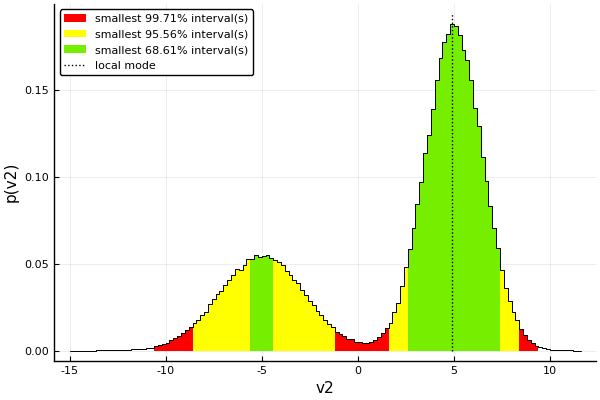

In [5]:
plot(samples, 2)

The default seriestype for plotting samples is `:smallest_intervals` (alias `:HDR`). The local mode
of the histogram is indicated as a dotted black line. 

Samples can either be plotted by their index (as shown above) or by using the parameter name as specified in the prior:

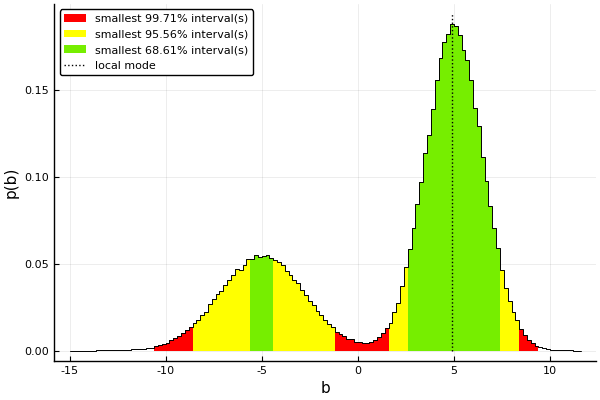

In [6]:
plot(samples, :b)

### Default 1D plot style for prior:

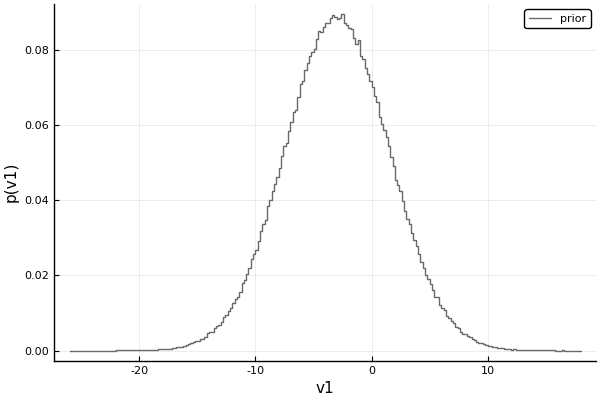

In [7]:
plot(prior, 1)

The default seriestype for a prior is `:stephist`.

Priors can also be plotted either by their index or by using the parameter names:

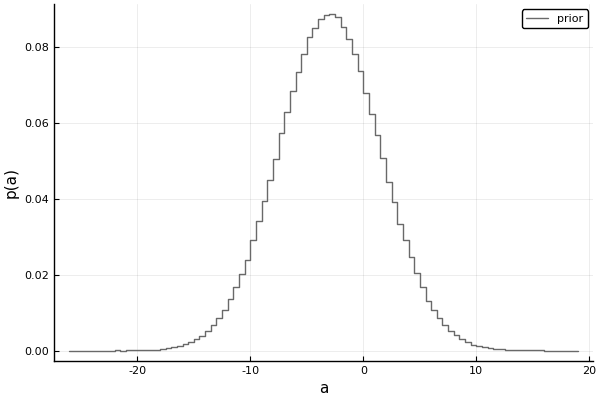

In [8]:
plot(prior, :a)

### Knowledge update
The knowledge update after performing the analysis can be visualized by plotting the prior and the samples of the psterior together in one plot using `plot!()`:

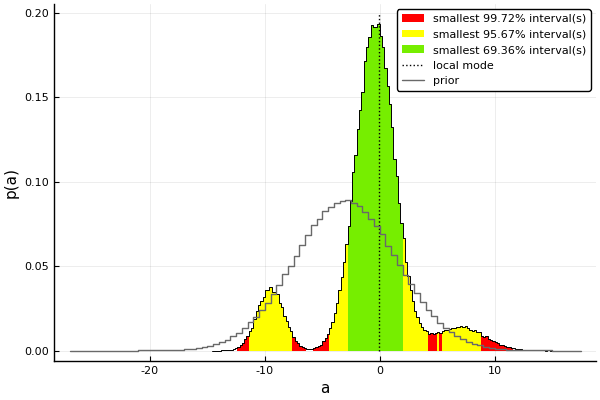

In [9]:
plot(samples, :a)
plot!(prior, :a)

## Further seriestypes for 1D plots:
### central intervals

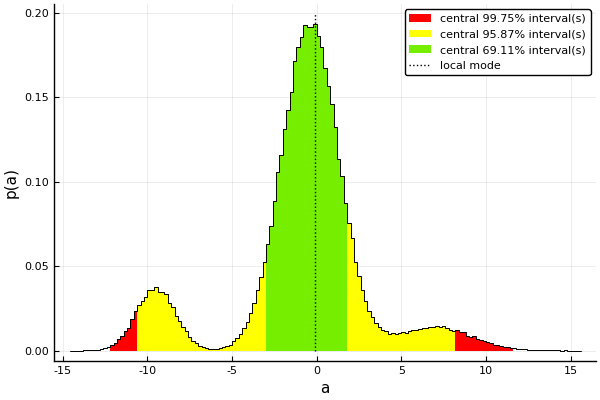

In [10]:
plot(samples, :a, seriestype = :central_intervals)

### customizing smallest & central interval plots:
The probability enclosed in the intervals to be highlighted can be specified using the `intervals` keyword. Their colors (in same order) need to be specified using the `colors` keyword argument.

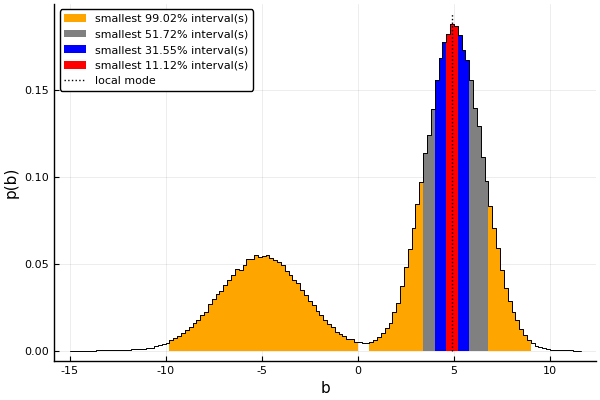

In [11]:
plot(samples, :b, seriestype=:smallest_intervals, intervals=[0.5, 0.1, 0.3, 0.99], colors=[:grey, :red, :blue, :orange])

### Filled histogram

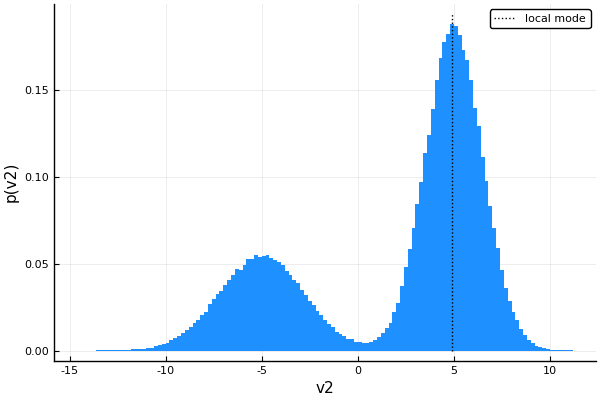

In [12]:
plot(samples, 2, seriestype = :histogram)

alias: `:hist`

### Step histogram

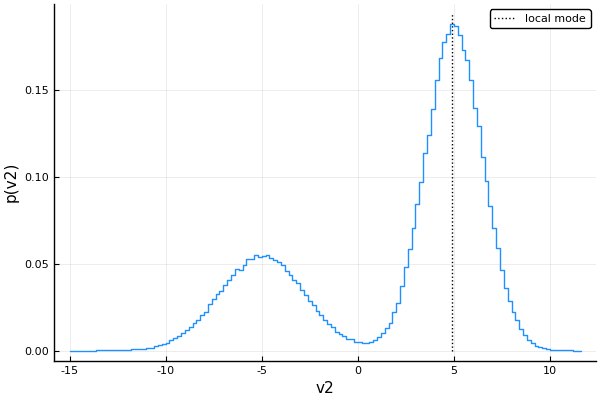

In [13]:
plot(samples, 2, seriestype = :stephist)

### Keyword arguments for [attributes supported by *Plots.jl*](https://docs.juliaplots.org/latest/attributes/#attributes-1) can be passed:

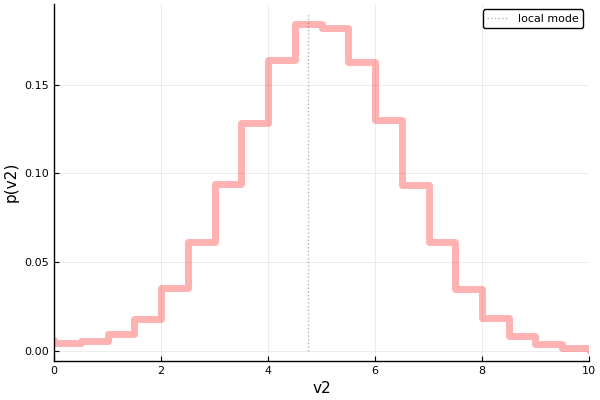

In [14]:
plot(samples, 2, seriestype = :stephist, nbins=50, linecolor = :red, linewidth = 5, linealpha=0.3, xlim=(0,10))

### Plotting point estimators in 1D plots:

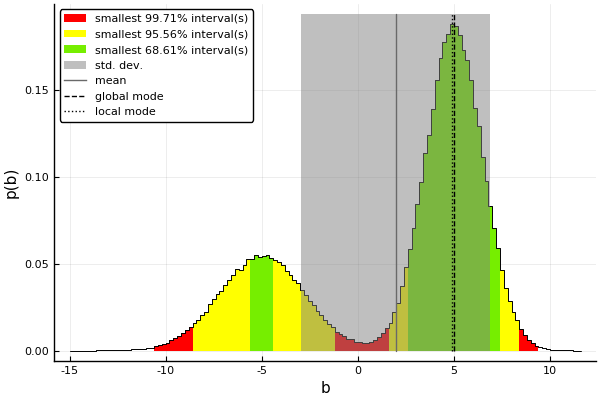

In [15]:
plot(samples, :b, globalmode=true, localmode=true, mean=true, std=true)

#### It is possible to customize the plot style of the estimators by passing a dict with the respective attributes:
By passing a boolean, the point estimators are plotted using their default styles shown above.
The styles can be modified by passing dictionaries specifying `linestyle`, `linecolor`, `linewidth` and `alpha` for *mean*, *globalmode* and *localmode*.
The style of the standard deviation can be modified by specifying `fillcolor` and `fillalpha`.

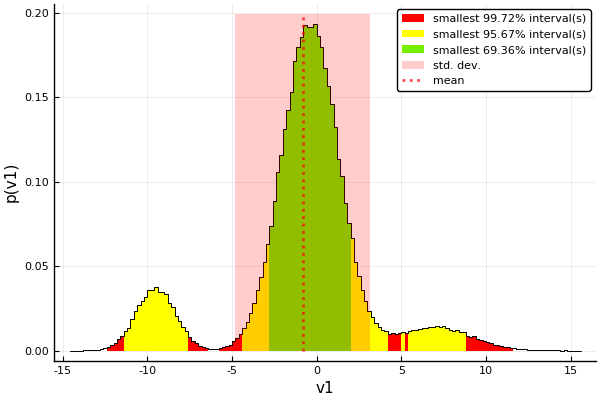

In [16]:
plot(samples, 1, localmode=false, mean=Dict("linestyle" => :dot, "linecolor"=> :red, "linewidth"=>2, "alpha" => 0.7), std=Dict("fillcolor" => :red, "fillalpha"=>0.2))

## Examples for 2D plots of the samples
Below, all available seriestypes and plotting features for 2D representations of samples are shown
### default 2D plot style:

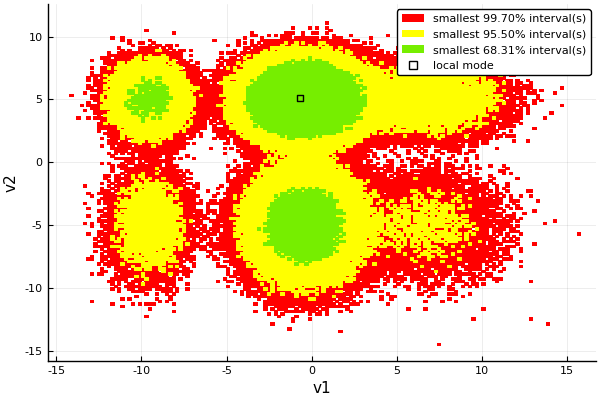

In [17]:
plot(samples, (1,2), nbins=200)

The default 2D plotting style is a 3-color heatmap showing the smallest intervals containing 68.3, 95.5 and 99.7 perecent of the posterior probability.

Samples can either be plotted by their index or by using the parameter names given in NamedTupleDist.

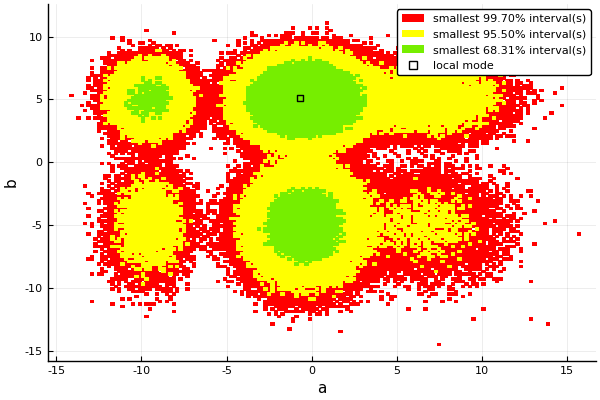

In [18]:
plot(samples, (:a, :b))

Prior can also be plotted by their index or by using the parameter names given in NamedTupleDist.

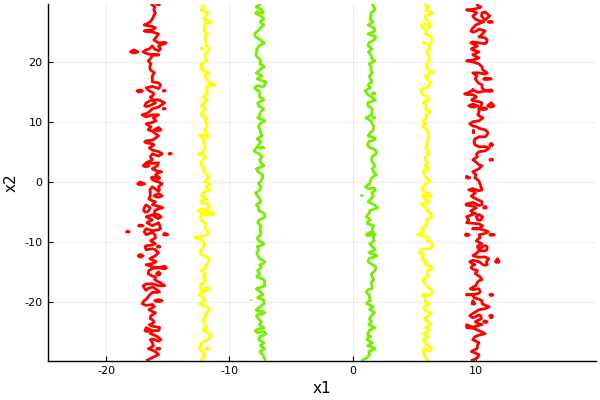

In [19]:
plot(prior, (1, 2))

or

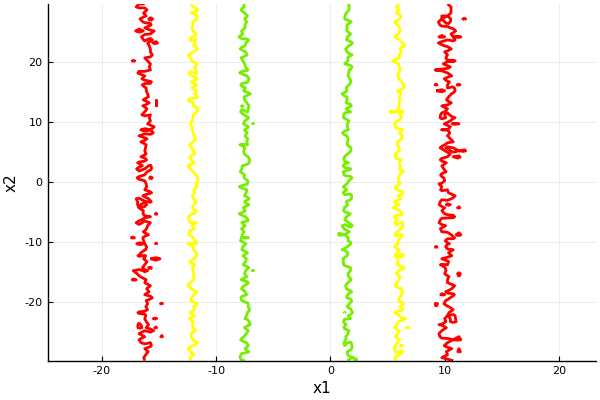

In [20]:
plot(prior, (:a, :b))

Plot prior + posterior

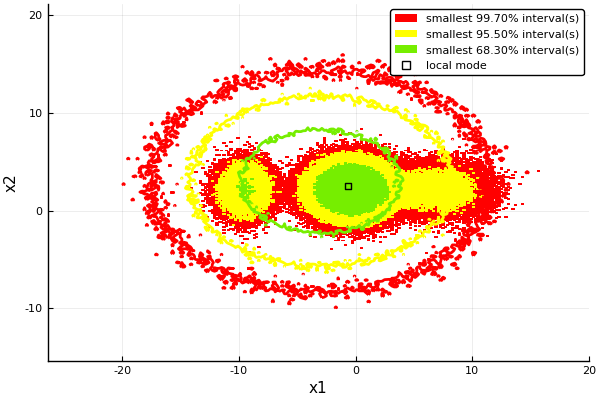

In [21]:
plot(samples, (:a, :c))
plot!(prior, (:a, :c))

### Further seriestypes available:
#### central intervals

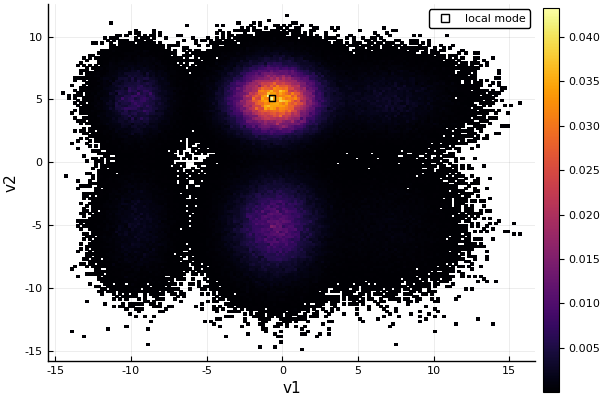

In [22]:
plot(samples, (1,2), seriestype = :histogram, nbins=200)

alias: `:histogram2d == :histogram`

#### smallest intervals as colored contour lines:
(currently only correctly supported with `pyplot()` backend)

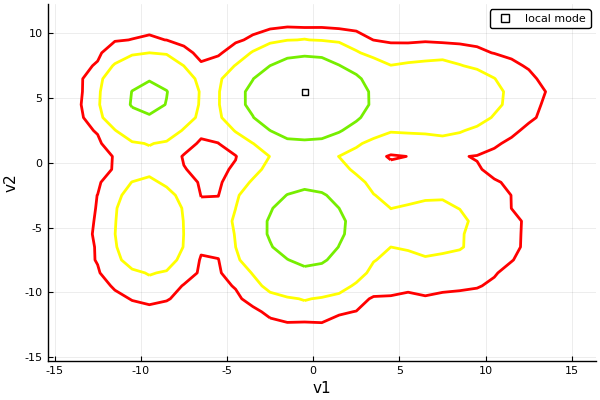

In [23]:
plot(samples, (1,2), seriestype=:smallest_intervals_contour, bins=40)

#### smallest intervals as filled contours:
(currently only correctly supported with `pyplot()` backend)

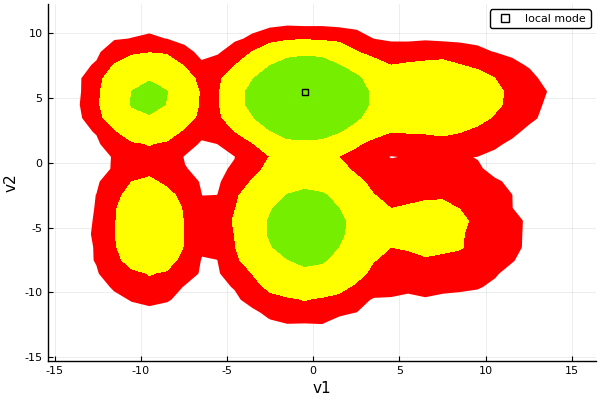

In [24]:
plot(samples, (1,2), seriestype=:smallest_intervals_contourf, bins=40)

### Customizing smallest interval plots:
The probability intervals to be highlighted can be specified using the `intervals` keyword. Their colors (in same order) need to be specified using the `colors` keyword argument.

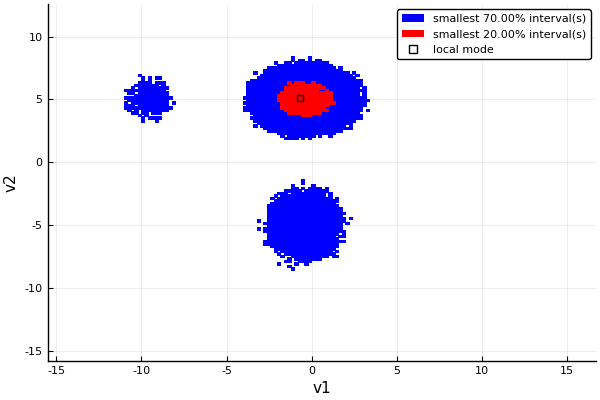

In [25]:
plot(samples, (1,2), seriestype=:smallest_intervals, nbins=200, intervals=[0.7, 0.2], colors=[:blue, :red])

#### scatter
for large number of samples, this plotting style needs a lot of time and resources

In [26]:
#plot(samples, (1,2), seriestype = :scatter)

### Plotting point estimators in 2D plots:

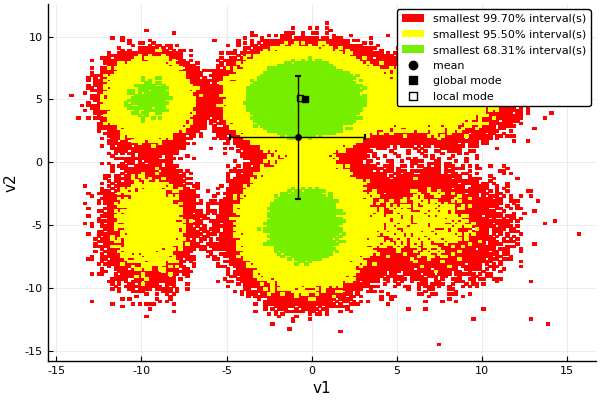

In [27]:
plot(samples, (1,2), seriestype=:smallest_intervals, nbins=200, mean=true, std=true, localmode=true, globalmode=true)

#### It is possible to customize the style of estimators by passing a dict with the respective attributes:
By passing a boolean, the point estimators are plotted using their default styles shown above.
The style of the point estimators can be modified by passing a dictionary specifying `markershape`, `markercolor`, `markersize`, `markeralpha`, `markerstrokecolor`, `markerstrokestyle`, `markerstrokewidth` and `markerstrokealpha` for *mean*, *globalmode* and *localmode*.
If `std_dev==true`, the standard deviation of the mean value will be displayed as x- and y-errorbars.

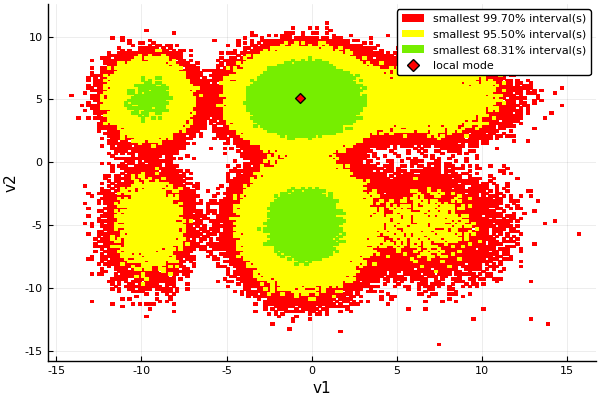

In [28]:
plot(samples, (1,2), seriestype=:smallest_intervals, nbins=200, localmode=Dict("markershape"=> :diamond, "markeralpha"=>1, "markercolor"=>:red, "markersize"=>5))

### Marginal plots

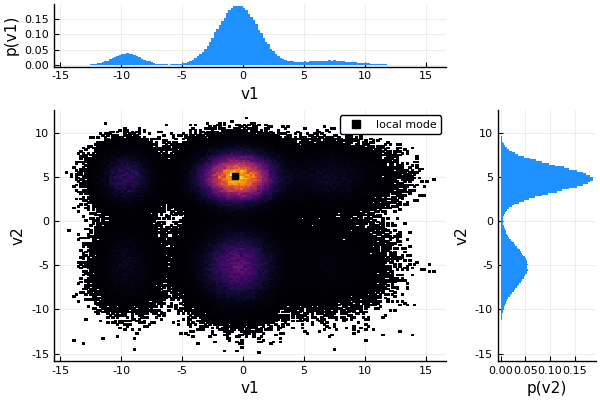

In [29]:
plot(samples, (1,2), seriestype = :marginal)

### Customizing marginal plots:
The marginal plots can be modified by passing dictionaries to the keyword arguments `upper`, `right` and `diagonal`.
The dictionaries for `upper` and `right` can contain the 1D seriestypes and plot options shown above.
The dictionary for `diagonal` can use the 2D seriestypes and plot options shown above.
Nested dictonaries are possible (e.g. for modifying point estimators)

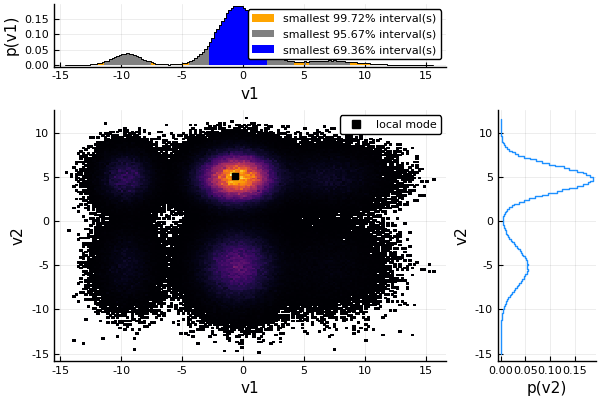

In [30]:
plot(samples, (1,2), seriestype = :marginal, diagonal = Dict("seriestype"=>:histogram, "mean"=>Dict("markercolor"=>:green)), upper=Dict("mean" => true, "seriestype" => :smallest_intervals, "colors"=>[:blue, :grey, :orange]), right=Dict("seriestype" => :stephist, "mean"=>true))

### Overview plot

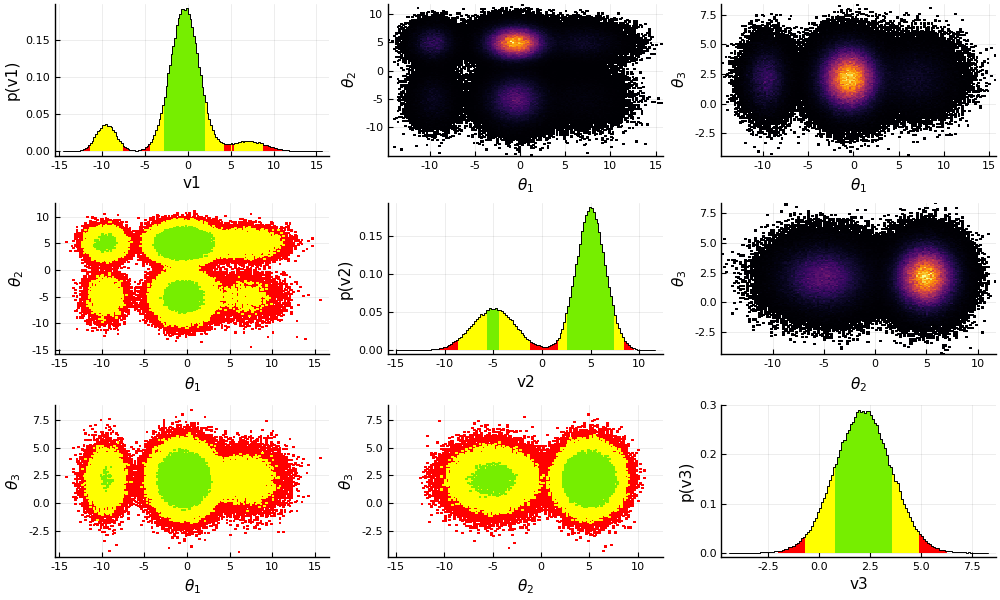

In [31]:
plot(samples)

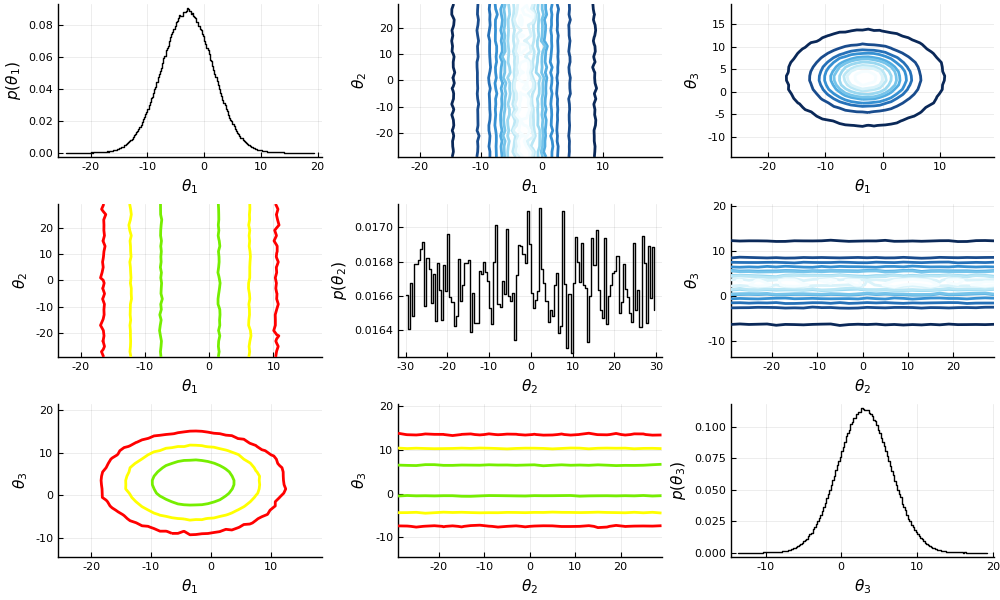

In [32]:
plot(prior)

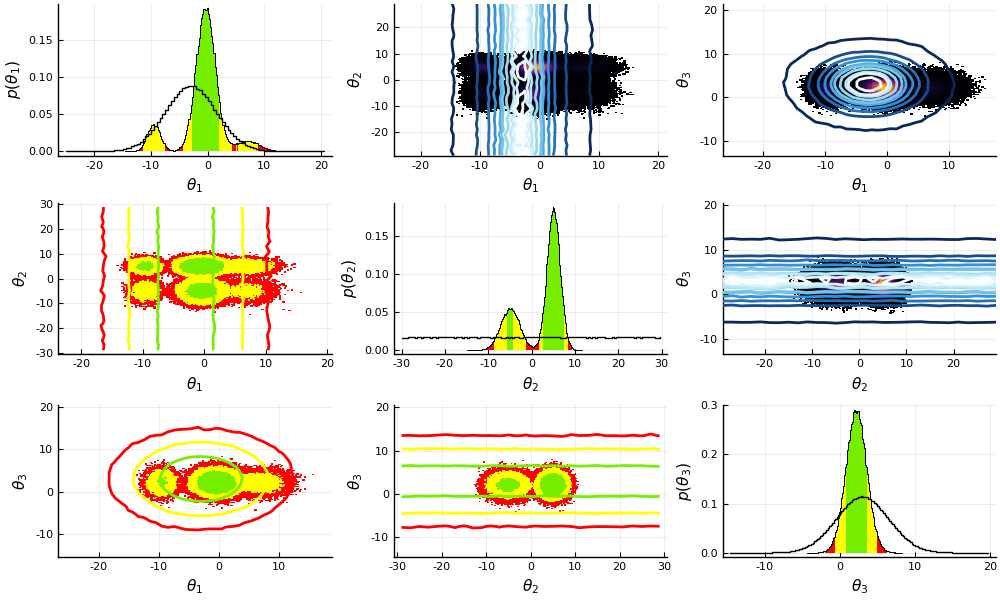

In [33]:
plot(samples)
plot!(prior)

By default the 1D and 2D plots for the first 5 parameters are shown.
The keyword argument `vsel` allows to specify the considered parameters.

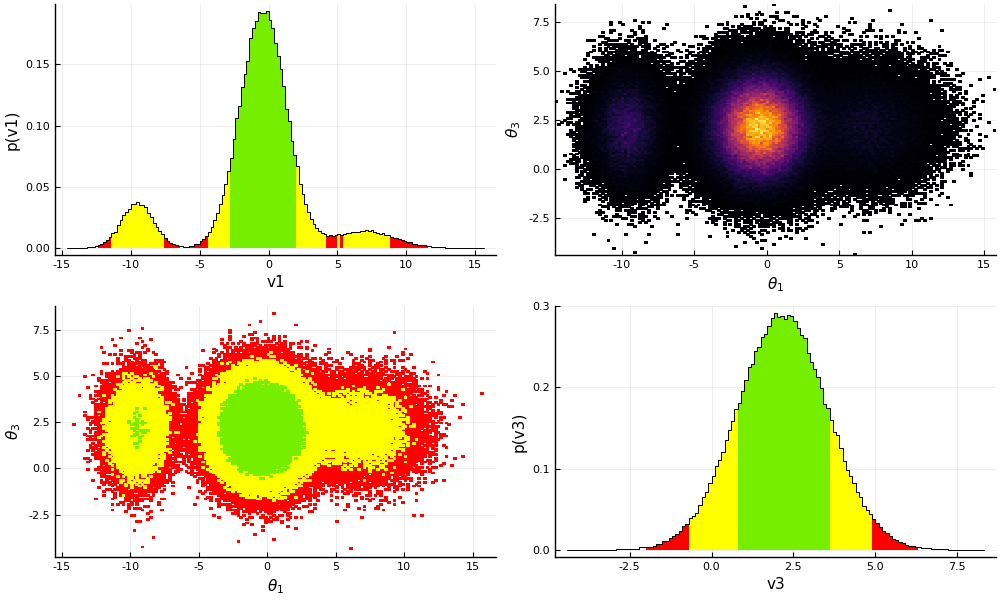

In [34]:
plot(samples, vsel=[1, 3])

### Customizing overview plots:
The overview plots can be modified by passing dictionaries to the keyword arguments `upper`, `lower` and `diagonal`.
The dictionaries for `upper` and `lower` can contain the 2D seriestypes and plot options shown above.
The dictionary for `diagonal` can use the 1D seriestypes and plot options shown above.
Nested dictonaries are possible (e.g. for modifying point estimators)

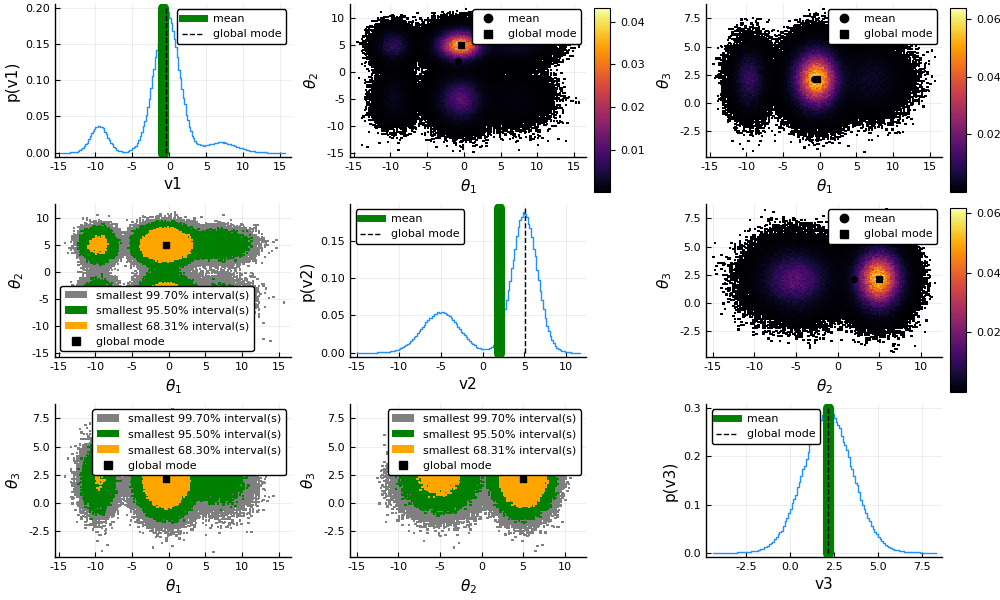

In [35]:
plot(samples, mean=true, globalmode=true, legend=true, diagonal=Dict("seriestype"=>:stephist, "mean"=>Dict("linecolor" => :green, "linewidth" => 8)), lower = Dict("mean" => false, "colors"=>[:orange, :green, :grey]))

## Plots for MCMC diagnostics
Plots histograms of the samples, the trace, a kernel density estimate and the autocorrelation function for each parameter per chain.

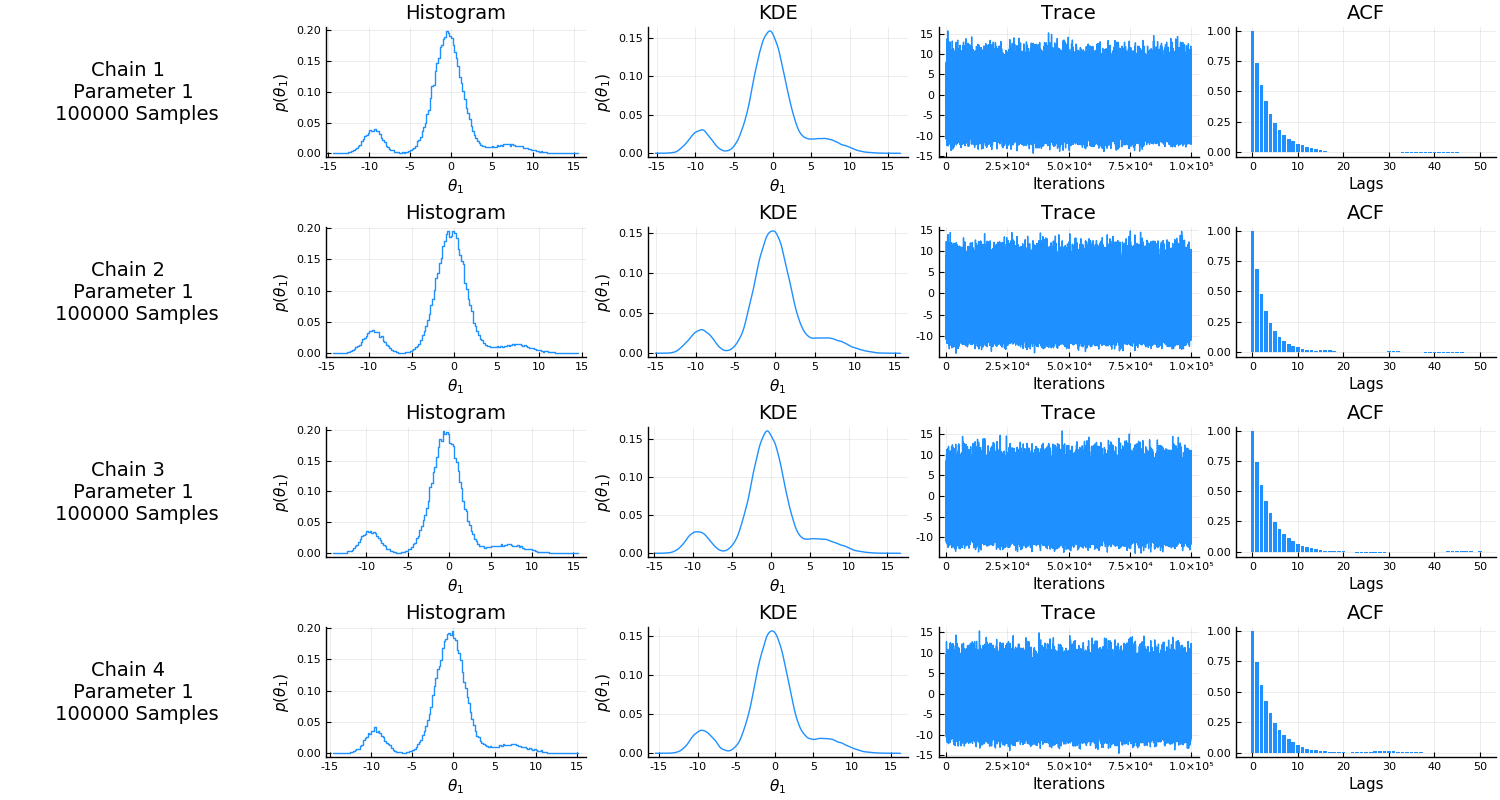

In [36]:
diagnostics = BAT.MCMCDiagnostics(samples, chains)
plot(diagnostics, vsel=[1])

### Customizing diagnostics plots:

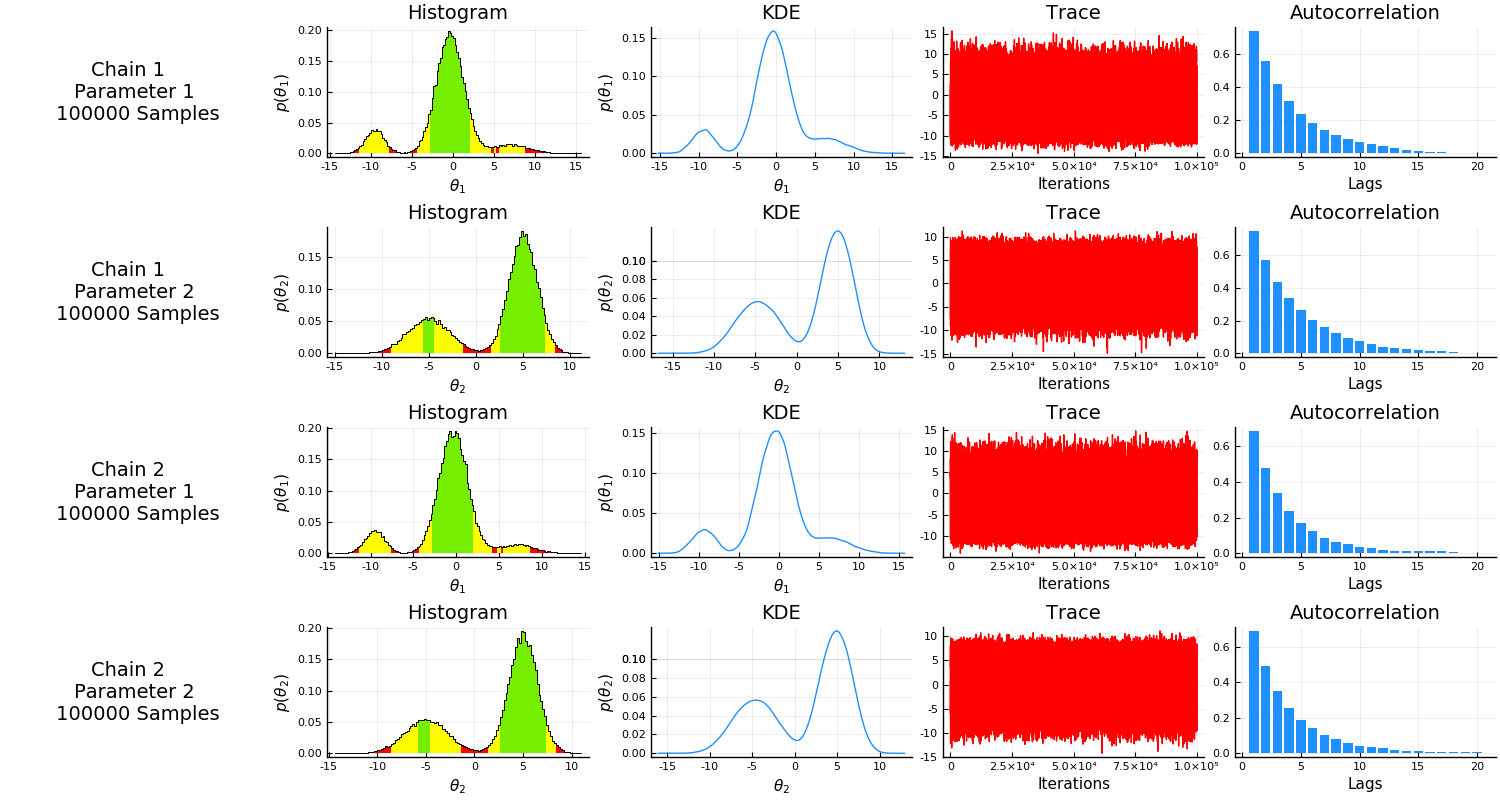

In [37]:
plot(diagnostics,
    vsel=[1, 2],
    chains=[1, 2],
    diagnostics = [:histogram, :kde, :trace, :acf],
    histogram = Dict("seriestype" => :smallest_intervals, "legend" => :false),
    trace = Dict("linecolor" => :red),
    acf = Dict("lags" => collect(1:20), "title"=> "Autocorrelation"),
    description = true)

### available keyword arguments:
* `vsel` - list of parameters to be plotted
* `chains` - list of chains to be plotted
* `diagnostics` - list of MCMC diagnostics to be plotted
* `:histogram` - 1D histograms of samples
* `:kde` - Kernel density estimate (using [*KernelDensity.jl*](https://github.com/JuliaStats/KernelDensity.jl))
* `:trace` - Trace plot
* `:acf` - Autocorrelation function (using [*StatsBase.autocor*](http://juliastats.github.io/StatsBase.jl/stable/signalcorr/#StatsBase.autocor))
* `description::Bool = true` - show description (current chain, parameter, number of samples) as first column of plots
* `histogram::Dict` - options for histogram plots (supports all arguments for 1D plots for samples)
* `kde::Dict` - options for kde plots
* `trace::Dict` - options for trace plots
* `acf::Dict` - options for acf plots

### special options arguments for `:kde` (see [*KernelDensity.jl*](https://github.com/JuliaStats/KernelDensity.jl))
* `npoints`: number of interpolation points to use (default: npoints = 2048)
* `boundary`: lower and upper limits of the kde as a tuple
* `kernel`: the distributional family from [*Distributions.jl*](https://github.com/JuliaStats/Distributions.jl) to use as the kernel (default = Distributions.Normal)
* `bandwidth`: bandwidth of the kernel

### special keyword arguments for `:acf` (see [*StatsBase.autocor*](http://juliastats.github.io/StatsBase.jl/stable/signalcorr/#StatsBase.autocor))
* `lags` - list of lags to be considered for ACF plots
* `demean` - denotes whether the mean should be subtracted before computing the ACF

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*